In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [3]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [4]:
df['Close'].dtypes

dtype('float64')

In [5]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df["Close"].head()

Date
2000-01-03    0.999442
2000-01-04    0.915179
2000-01-05    0.928571
2000-01-06    0.848214
2000-01-07    0.888393
Name: Close, dtype: float64

In [7]:
# df["Close"] = df["Close"].str.replace(",","")
#  = df["Close"].apply(lambda x: float(x))
# df["Close"]=df["Close"].apply(pd.to_numeric)

In [8]:
df["Close"] = df["Close"].astype(str).str.replace(",","")
close = df["Close"].apply(lambda x: float(x))
df["Close"]=df["Close"].apply(pd.to_numeric)

In [9]:
df["Open"] = df["Open"].astype(str).str.replace(",","")
open = df["Close"].apply(lambda x: float(x))

In [10]:
df["High"] = df["High"].astype(str).str.replace(",","")
high = df["High"].apply(lambda x: float(x))

In [11]:
df["Low"] = df["Low"].astype(str).str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

In [12]:
df["Adj Close"] = df["Adj Close"].astype(str).str.replace(",","")
adjclose = df["Adj Close"].apply(lambda x: float(x))

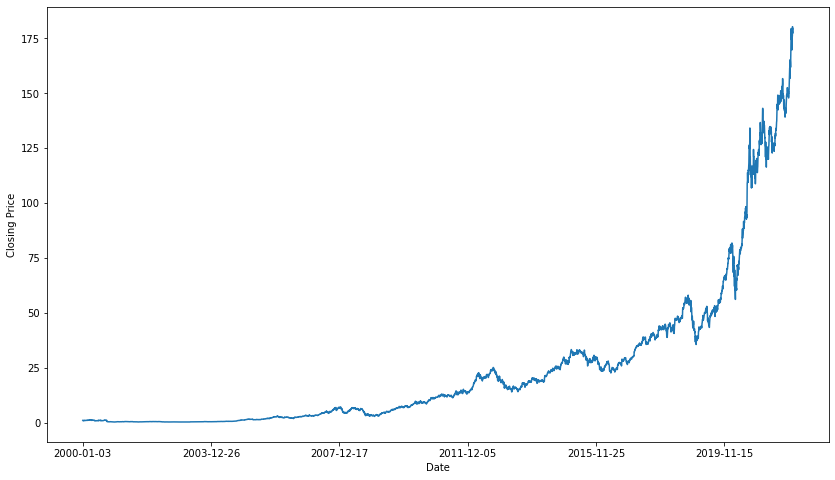

In [13]:
df['Close'].plot(figsize=(14,8))
plt.ylabel("Closing Price")
plt.show()

**Data Pre-processing**

In [14]:
df.isna().sum() 

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df["Close"].value_counts()

0.267857      6
0.348214      6
0.265179      5
0.262500      4
0.256429      4
             ..
3.478571      1
3.638929      1
3.498214      1
3.717143      1
177.570007    1
Name: Close, Length: 5057, dtype: int64

In [16]:
df.value_counts()

Open        High        Low         Close       Adj Close   Volume    
0.231964    0.244107    0.230714    0.236429    0.201871    1016176000    1
3.285357    3.357143    3.273214    3.352500    2.862472    686896000     1
3.303929    3.327143    3.196429    3.197857    2.730433    1074836000    1
3.301071    3.33        3.214643    3.218571    2.748118    1178976400    1
3.293214    3.31        3.252143    3.273571    2.795079    870486400     1
                                                                         ..
128.960007  129.100006  126.120003  126.660004  125.365196  192541500     1
128.949997  130.389999  128.520004  130.360001  129.220169  88844600      1
128.899994  129.580002  128.039993  128.699997  127.384323  94359800      1
128.889999  131.740005  128.429993  131.009995  129.670715  97664900      1
99.172501   99.25       96.7425     97.000000   95.670547   103433200     1
Length: 5536, dtype: int64

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
2000-01-04,0.966518,0.987723,0.90346,0.915179,0.781409,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [18]:
df.drop("Volume", axis=1, inplace=True)

In [19]:
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355
2000-01-04,0.966518,0.987723,0.90346,0.915179,0.781409
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538


In [20]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

**Feature Selection**

In [21]:
df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.586868
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.551132
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.640778
2021-12-30,179.470001,180.570007,178.089996,178.199997,177.465637
2021-12-31,178.089996,179.229996,177.259995,177.570007,176.838242


In [22]:
x = df.iloc[:, 0:5].values



In [23]:
x

array([['0.936384', '1.004464', '0.907924', 0.999442, '0.853355'],
       ['0.966518', '0.987723', '0.90346', 0.915179, '0.781409'],
       ['0.926339', '0.987165', '0.919643', 0.928571, '0.792844'],
       ...,
       ['179.330002', '180.630005', '178.139999', 179.380005,
        '178.640778'],
       ['179.470001', '180.570007', '178.089996', 178.199997,
        '177.465637'],
       ['178.089996', '179.229996', '177.259995', 177.570007,
        '176.838242']], dtype=object)

In [24]:
y = df.iloc[:, 4].values

In [25]:
y 

array(['0.853355', '0.781409', '0.792844', ..., '178.640778',
       '177.465637', '176.838242'], dtype=object)

x is holding values for the open, high, low, close, Adj Close columns and y is holding the value of Adj Close columns

Divide the dataset into train and test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)

In [27]:
#Scaling the features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Hyperparameter Tuning
For a random forest regression model, we are considering the follwing parameters:

n_estimators — number of trees in the forest <br>
max_depth — maximum depth in a tree <br>
min_samples_split — minimum number of data points before the sample is split <br>
min_samples_leaf — minimum number of leaf nodes that are required to be sampled <br>
bootstrap — sampling for data points, true or false <br>
random_state — generated random numbers for the random forest. <br>

In [28]:
# grid_rf = {
# 'n_estimators': [20, 50, 100, 500, 1000],  
# 'max_depth': np.arange(1, 15, 1),  
# 'min_samples_split': [2, 10, 9], 
# 'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
# 'bootstrap': [True, False], 
# 'random_state': [1, 2, 30, 42]
# }
# rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=10, n_jobs=-1, verbose=2, n_iter=200)
# rscv_fit = rscv.fit(X_train, y_train)
# best_parameters = rscv_fit.best_params_
# print(best_parameters)

Apply model and Predict

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=30, min_samples_split=2, min_samples_leaf=1, max_depth=12, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [30]:
print(predict)

[  0.85538622   6.01180435   0.33324011 ...   0.26044285 135.77843938
   0.3547208 ]


In [31]:
print(predict.shape)

(1108,)


In [40]:
import sklearn.metrics as metrics

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 5))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 5))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 5))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 5))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
#errors = abs(predict-float(y_test)
             
#mape=100*(errors / y_test)
             
#mape = np.mean(np.abs(predict-float(y_test)/y_test)*100
             
             
#accuracy = 100 - np.mean(mape)
               
#print('Accuracy:', round(accuracy, 2), '%.') 
#accuracy=round (100 - np.mean(mape),2)
               
#accuracy=round (100 - np.mean(mape),2)

#print('Accuracy:', round(accuracy, 2), '%.') 


Mean Absolute Error: 0.03127
Mean Squared Error: 0.01374
Root Mean Squared Error: 0.11723
(R^2) Score: 0.99999
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.


In [41]:
df.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='Date', length=5536)

In [42]:
df.index[0]

'2000-01-03'

In [43]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))

In [44]:
predictions

,Predictions
2021-12-31,0.855386
2022-01-01,6.011804
2022-01-02,0.333240
2022-01-03,26.495714
2022-01-04,41.963204
...,...
2025-01-07,0.545017
2025-01-08,30.134799
2025-01-09,0.260443
2025-01-10,135.778439


In [51]:
thirtydays_df_pred = pd.DataFrame(predictions[:30])

In [52]:
thirtydays_df_pred 

,Predictions
2021-12-31,0.855386
2022-01-01,6.011804
2022-01-02,0.333240
2022-01-03,26.495714
2022-01-04,41.963204
2022-01-05,0.326636
2022-01-06,1.112435
2022-01-07,118.962732
2022-01-08,0.271207
2022-01-09,24.227048
